<a href="https://colab.research.google.com/github/rybak97/GSN_2/blob/main/GSN_2_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import mean_squared_error
from keras import backend as K
import numpy as np

1. YOLO model

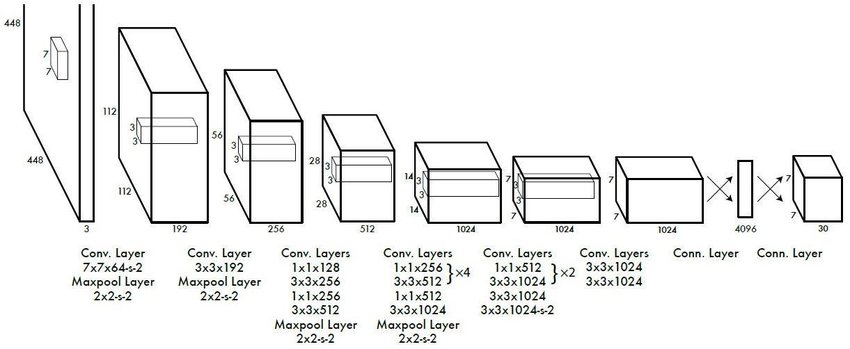

In [28]:
lrelu = tf.keras.layers.LeakyReLU(alpha=0.1)

model = Sequential()
model.add(Conv2D(filters=64, kernel_size= (7, 7), strides=(2, 2), input_shape =(448, 448, 3), padding = 'same', activation=lrelu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

model.add(Conv2D(filters=192, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

model.add(Conv2D(filters=128, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=256, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=256, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=512, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

model.add(Conv2D(filters=256, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=512, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=256, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=512, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=256, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=512, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=256, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=512, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=512, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=1024, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

model.add(Conv2D(filters=512, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=1024, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=512, kernel_size= (1, 1), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=1024, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=1024, kernel_size= (3, 3), padding = 'same', activation=lrelu))
model.add(Conv2D(filters=1024, kernel_size= (3, 3), strides=(2, 2), padding = 'same'))

model.add(Conv2D(filters=1024, kernel_size= (3, 3), activation=lrelu,padding = 'same'))
model.add(Conv2D(filters=1024, kernel_size= (3, 3), activation=lrelu,padding = 'same'))

model.add(Flatten())
model.add(Dense(4096, activation='sigmoid'))
model.add(Dense(1470, activation='sigmoid'))
model.add(Reshape(target_shape=(7,7,30)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 224, 224, 64)      9472      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_49 (Conv2D)          (None, 112, 112, 192)     110784    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 192)      0         
 2D)                                                             
                                                                 
 conv2d_50 (Conv2D)          (None, 56, 56, 128)       24704     
                                                                 
 conv2d_51 (Conv2D)          (None, 56, 56, 256)      

2. IOU

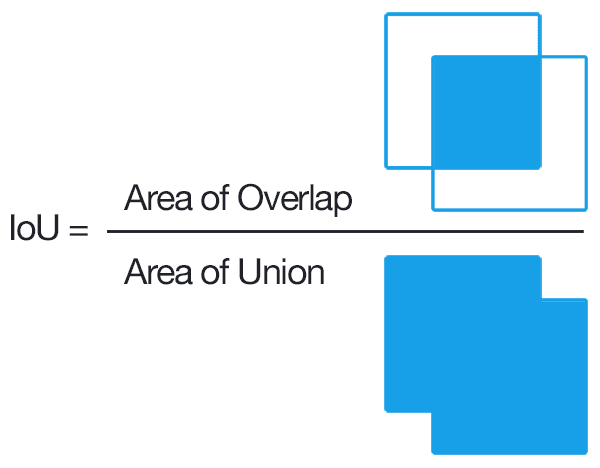

In [29]:
def iou(box1, box2): #(x,y,w,h)

    b1_x1 = box1[0] - (box1[2]/2)
    b1_x2 = box1[0] + (box1[2]/2)

    b2_x1 = box2[0] - (box2[2]/2)
    b2_x2 = box2[0] + (box2[2]/2)

    b1_y1 = box1[1] - (box1[3]/2)
    b1_y2 = box1[1] + (box1[3]/2)

    b2_y1 = box2[1] - (box2[3]/2)
    b2_y2 = box2[1] + (box2[3]/2)
    
        
    xA = max(b1_x1, b2_x1)
    yA = max(b1_y1, b2_y1)
    xB = min(b1_x2, b2_x2)
    yB = min(b1_y2, b2_y2)
    and_area = (xB - xA) * (yB - yA)

    box1_area = (b1_x2 - b1_x1) * (b1_y2 - b1_y1)
    box2_area = (b2_x2 - b2_x1) * (b2_y2 - b2_y1)
    or_area = box1_area + box2_area - and_area
    
    iou = and_area / or_area
    
    return iou

In [30]:
box1 = np.array([120, 90, 80, 40]) #(x,y,w,h)
box2 = np.array([123, 85, 80, 40])

test_iou = iou(box1, box2)

print(test_iou)

0.7273954116059379


3. Loss function

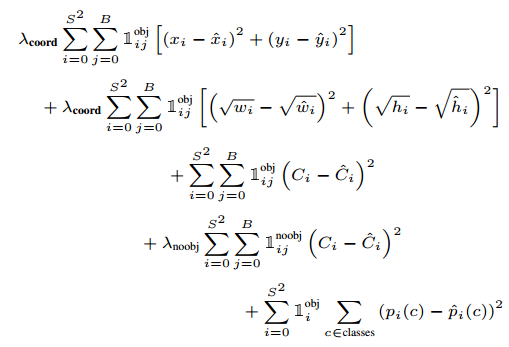

For evaluating YOLO on PASCAL VOC, we use S = 7,
B = 2. PASCAL VOC has 20 labelled classes so C = 20.
Our final prediction is a 7 × 7 × 30 tensor.

In [36]:
class Loss():
  def __init__(self, S = 7, B = 2, C = 20):
    self.S = S
    self.B = B
    self.C = C
    self.lambda_noobj = 0.5
    self.lambda_coord = 5

  def forward(self, pred, real):
    # 0:19 -> class prop, 20 real class, 21:25 box1, 26:30 box2

    iou_1 = iou(pred[21:25], real[21:25]) # x, y, w, h
    iou_2 = iou(pred[26:30], real[21:25])

    print("box_1 xywh[21:25]: ", pred[21:25])
    print("box_2 xywh[26:30]: ", pred[26:30])
    print("real xywh: ", real[21:25])
    
    print("IOU for box_1 ",iou_1)
    print("IOU for box_2 ",iou_2)

    ious = np.concatenate((np.array([iou_1]), np.array([iou_2])), axis=0)
    bestbox = np.argmax(ious)
    exists_box = real[20]

    ### For box coordinates:
    box_predictions = exists_box * ((bestbox * pred[26:30] + (1 - bestbox) * pred[21:25]))

    box_targets = exists_box * real[21:25]

    box_predictions[2:4] = np.sign(box_predictions[2:4]) * np.sqrt(np.abs(box_predictions[2:4]))

    box_targets[2:4] = np.sqrt(box_targets[2:4])

    box_loss = mean_squared_error(box_predictions, box_targets)

    ### For object loss
    pred_box = (bestbox * pred[25:26] + (1 - bestbox) * pred[20:21])
   
    object_loss = mean_squared_error(exists_box * pred_box, exists_box * real[20:21])

    ### For no object loss
    no_object_loss = mean_squared_error((1 - exists_box) * pred[20:21],(1 - exists_box) * real[20:21])

    no_object_loss += mean_squared_error((1 - exists_box) * pred[25:26],(1 - exists_box) * real[20:21])

    ### For class loss ###
    class_loss = mean_squared_error(exists_box * pred[:20], exists_box * real[:20])
    print(class_loss)


    ### Total loss
    loss = (
        self.lambda_coord * box_loss
        + object_loss
        + self.lambda_noobj * no_object_loss
        + class_loss
    )

    return loss

In [39]:
yolo_loss = Loss()

x = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 120, 90, 80, 40, 0.8, 123, 85, 80, 40])
y = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1., 125, 95, 80, 40])

yolo_loss.forward(x, y)

box_1 xywh[21:25]:  [120.  90.  80.  40.]
box_2 xywh[26:30]:  [123.  85.  80.  40.]
real xywh:  [125.  95.  80.  40.]
IOU for box_1  0.695364238410596
IOU for box_2  0.5763546798029556
tf.Tensor(0.0, shape=(), dtype=float64)


<tf.Tensor: shape=(), dtype=float64, numpy=62.54>